In [41]:
# Import libraries
import os
import sys
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur agar plot dari matplotlib muncul di notebook
%matplotlib inline

# Atur agar plot tampil rapi
sns.set(style="whitegrid")

In [38]:
# Load dataset
try:
    df = pd.read_csv('../data/SSGI_2024_dataset.csv')
    print("Dataset berhasil dimuat!")
except FileNotFoundError:
    print("File tidak ditemukan. Mohon periksa nama file dan lokasinya.")


Dataset berhasil dimuat!


In [62]:
# Menampilkan 5 baris pertama untuk melihat contoh data
print("--- 5 Baris Pertama Data ---")
print(df.head())

# Menampilkan informasi ringkas
print("\n--- Informasi Umum Dataset ---")
df.info()

# Menampilkan statistik deskriptif
print("\n--- Statistik Deskriptif ---")
print(df.describe().T)

--- 5 Baris Pertama Data ---
         Provinsi prevalensi_underweight_persen  prevalensi_stunting_persen  \
0            Aceh                          23,7                        28.6   
1  Sumatera Utara                          17,7                        22.0   
2  Sumatera Barat                          18,8                        24.9   
3            Riau                          20,1                        20.1   
4           Jambi                          13,8                        17.1   

  prevalensi_wasting_persen persen_jarak_kehamilan_berisiko  \
0                       9,6                             9,7   
1                         9                            17,3   
2                         7                            13,8   
3                      10,8                            12,7   
4                       8,6                             5,1   

  persen_usia_ibu_berisiko persen_tidak_ikut_kelas_bumil  \
0                      9,4                          48,3 

In [68]:
plot_data = df.copy()

# Mengubah kolom bertipe object menjadi float64, kecuali 'Provinsi'
for col in plot_data.columns:
    if col != 'Provinsi' and plot_data[col].dtype == 'object':
        plot_data[col] = plot_data[col].str.replace(',', '.', regex=False)
        plot_data[col] = pd.to_numeric(plot_data[col], errors='coerce')

print(plot_data.dtypes)


Provinsi                                     object
prevalensi_underweight_persen               float64
prevalensi_stunting_persen                  float64
prevalensi_wasting_persen                   float64
persen_jarak_kehamilan_berisiko             float64
persen_usia_ibu_berisiko                    float64
persen_tidak_ikut_kelas_bumil               float64
persen_masalah_buku_kia                     float64
persen_kia_tidak_dijelaskan                 float64
persen_anc_tidak_lengkap_k6                 float64
persen_anc_tempat_informal                  float64
persen_usg_tidak_lengkap                    float64
persen_usg_oleh_non_spesialis               float64
persen_tidak_patuh_minum_ttd                float64
persen_mulai_ttd_terlambat                  float64
persen_bblr                                 float64
persen_pblr                                 float64
persen_imd_terlambat                        float64
persen_tidak_pernah_asi                     float64
persen_tidak

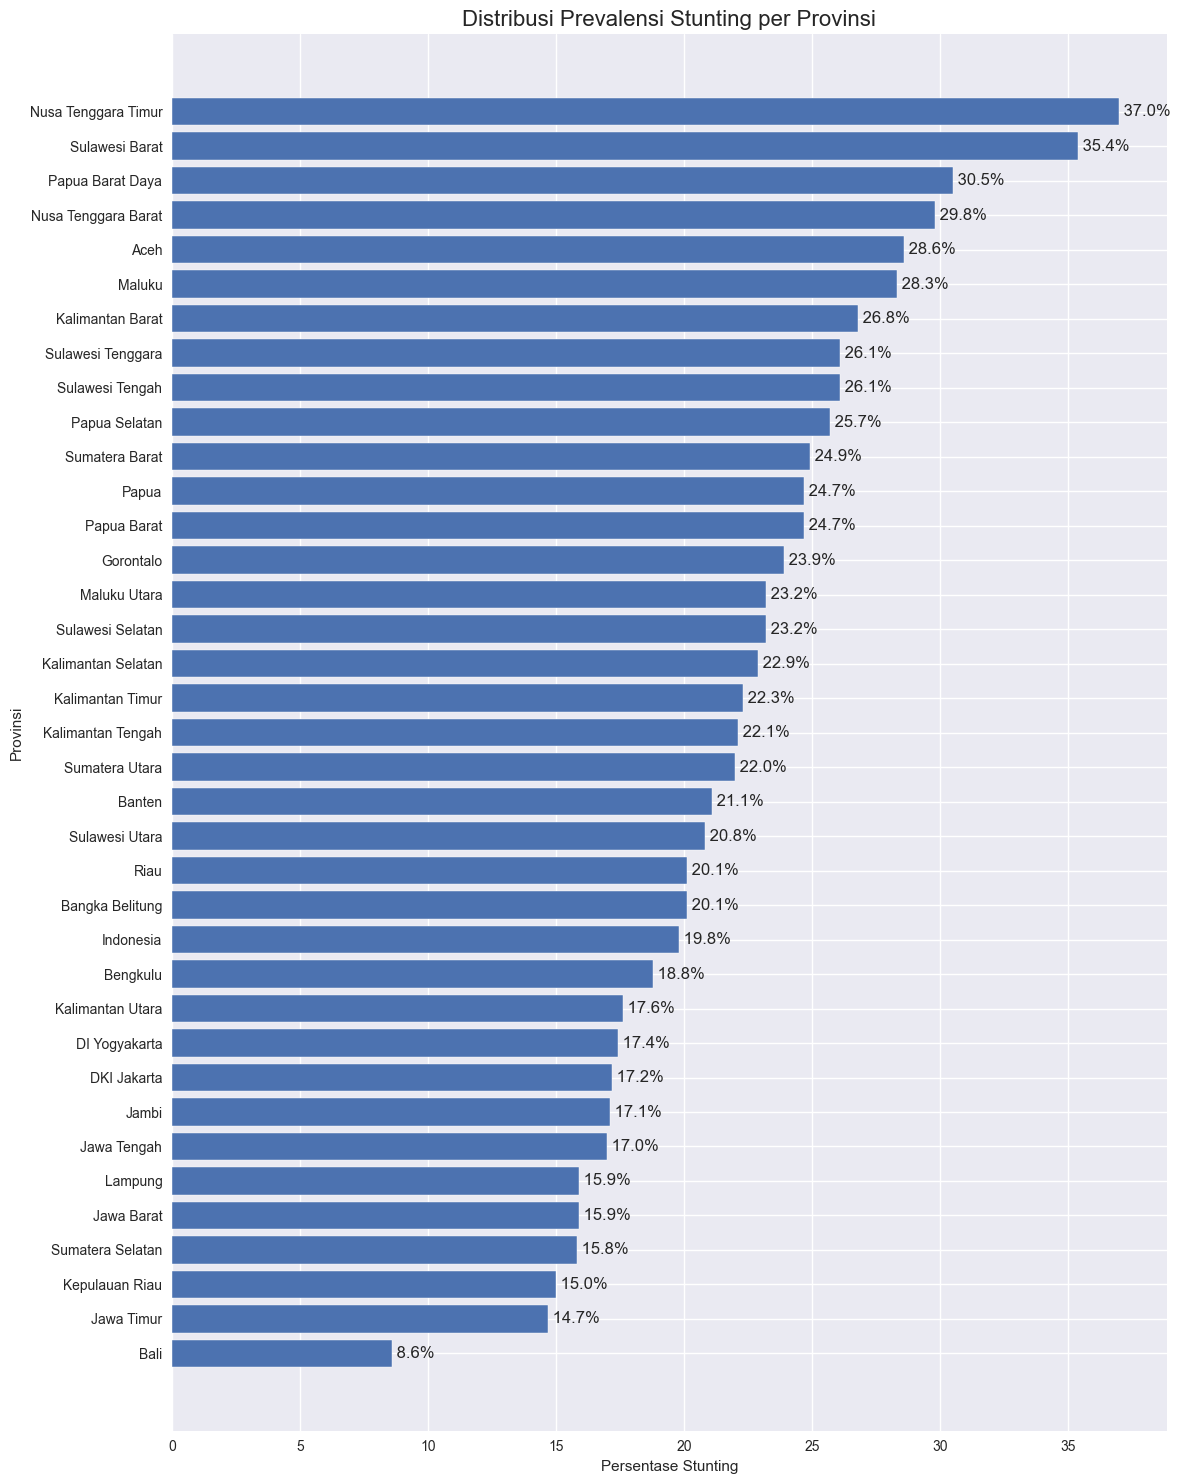

In [72]:
target_variable = 'prevalensi_stunting_persen'

# Create horizontal bar plot
plt.figure(figsize=(12, 15))

# Remove rows with NaN values and sort values in ascending order
plot_data_clean = plot_data.dropna(subset=[target_variable]).sort_values(by=target_variable, ascending=True)

# Create horizontal bar plot
plt.barh(plot_data_clean['Provinsi'], plot_data_clean[target_variable])
plt.title('Distribusi Prevalensi Stunting per Provinsi', fontsize=16)
plt.xlabel('Persentase Stunting')
plt.ylabel('Provinsi')

# Add value labels on the bars
for i, v in enumerate(plot_data_clean[target_variable]):
    plt.text(v, i, f' {v:.1f}%', va='center')

plt.tight_layout()
plt.show()

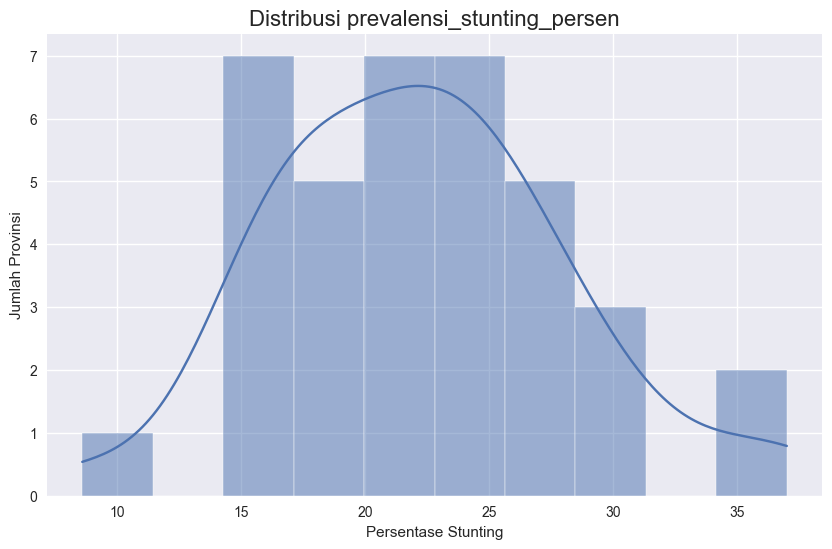


--- 5 Provinsi dengan Stunting Tertinggi ---
               Provinsi  prevalensi_stunting_persen
18  Nusa Tenggara Timur                        37.0
29       Sulawesi Barat                        35.4
33     Papua Barat Daya                        30.5
17  Nusa Tenggara Barat                        29.8
0                  Aceh                        28.6

--- 5 Provinsi dengan Stunting Terendah ---
            Provinsi  prevalensi_stunting_persen
16              Bali                         8.6
14        Jawa Timur                        14.7
9     Kepulauan Riau                        15.0
5   Sumatera Selatan                        15.8
11        Jawa Barat                        15.9


In [66]:
# Plot distribusi stunting menggunakan histogram dan KDE
plt.figure(figsize=(10, 6))
sns.histplot(df[target_variable], kde=True, bins=10)
plt.title(f'Distribusi {target_variable}', fontsize=16)
plt.xlabel('Persentase Stunting')
plt.ylabel('Jumlah Provinsi')
plt.show()

# Menampilkan provinsi dengan stunting tertinggi dan terendah
print("\n--- 5 Provinsi dengan Stunting Tertinggi ---")
print(df.sort_values(by=target_variable, ascending=False)[['Provinsi', target_variable]].head())

print("\n--- 5 Provinsi dengan Stunting Terendah ---")
print(df.sort_values(by=target_variable, ascending=True)[['Provinsi', target_variable]].head())


--- Korelasi Variabel Lain terhadap prevalensi_stunting_persen ---
prevalensi_stunting_persen                  1.000000
prevalensi_underweight_persen               0.934228
prevalensi_wasting_persen                   0.781322
persen_anc_tidak_lengkap_k6                 0.610368
persen_akses_sanitasi_berisiko              0.579484
persen_tidak_memenuhi_mmff                  0.576251
persen_usg_tidak_lengkap                    0.549585
persen_usia_ibu_berisiko                    0.511412
persen_usg_oleh_non_spesialis               0.506613
persen_tidak_memenuhi_mdd                   0.474258
persen_akses_air_minum_berisiko             0.468485
persen_konsumsi_minuman_manis               0.461836
persen_tidak_memenuhi_mad                   0.439443
persen_anc_tempat_informal                  0.439193
persen_imunisasi_dasar_incomplete           0.438372
persen_imunisasi_pcv_incomplete             0.417104
persen_keluarga_tanpa_tpk                   0.414828
persen_masalah_buku_kia        

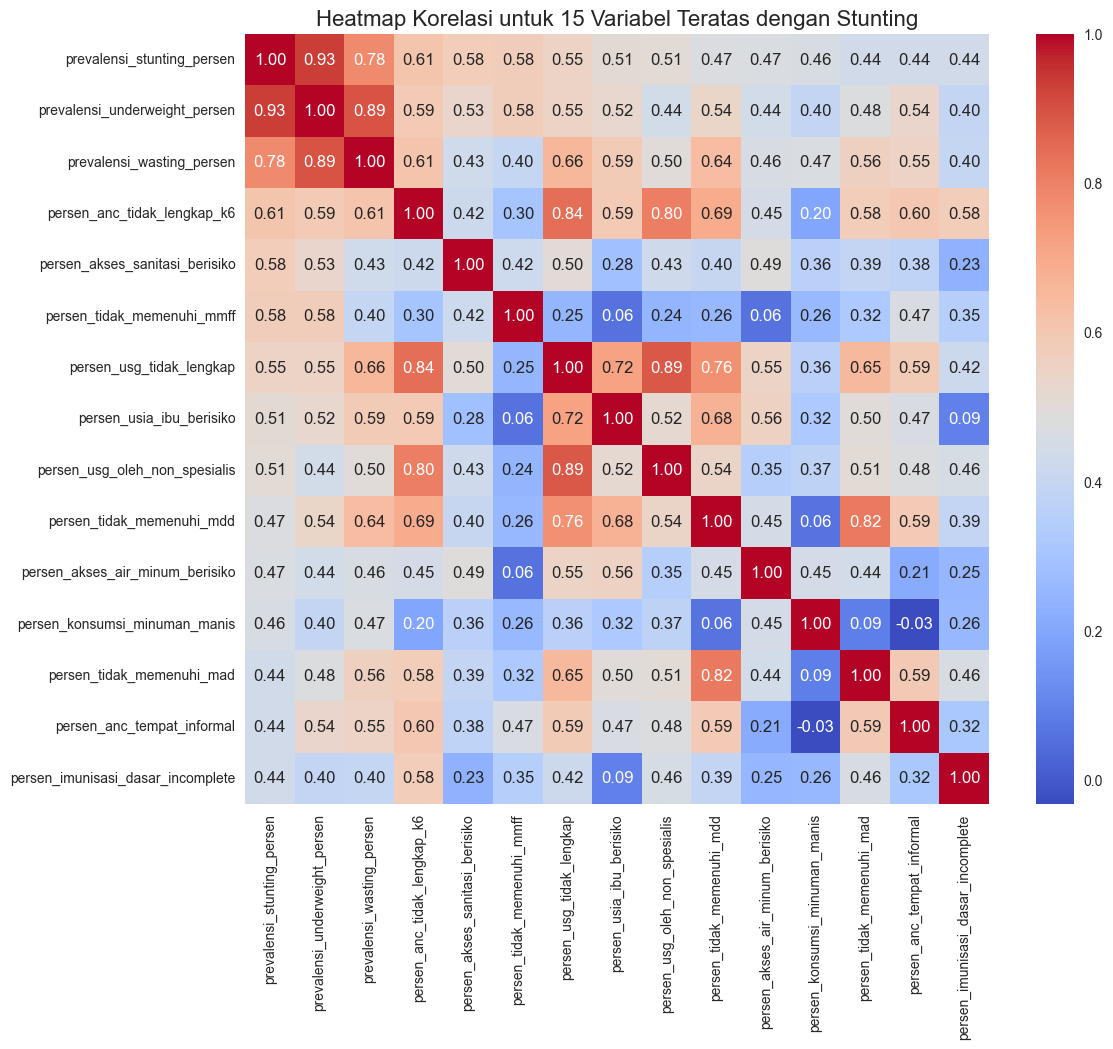

In [74]:
# Menghitung matriks korelasi
correlation_matrix = plot_data.corr(numeric_only=True)

# Menampilkan korelasi semua variabel terhadap stunting
# Diurutkan dari yang paling berkorelasi positif hingga negatif
stunting_correlation = correlation_matrix[target_variable].sort_values(ascending=False)

print(f"\n--- Korelasi Variabel Lain terhadap {target_variable} ---")
print(stunting_correlation)

# Visualisasi korelasi menggunakan heatmap (untuk 15 variabel teratas)
top_15_vars = stunting_correlation.head(15).index
plt.figure(figsize=(12, 10))
sns.heatmap(plot_data[top_15_vars].corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi untuk 15 Variabel Teratas dengan Stunting', fontsize=16)
plt.show()